# 06. Choisir et optimiser un modèle

In [3]:
from IPython.display import HTML, Image
import pandas as pd
data = pd.read_csv("data/data.csv").dropna()
data['state'] = data['state'].astype("category").cat.codes

## –– Sommaire

### A. Choisir un modèle

• Split  
• Sélection du modèle  
• Validation croisée  
• Compromis biais-variance (under/overfitting)  

### B. Optimiser un modèle (Hyperparameters tuning)

• GridSearchCV  
• RandomizedSearchCV  

### C. Metrics pour les régressions

• x  
• x  

### D. Metrics pour les classifications

• Données déséquilibrées et Approche naïve  
• Les types d'erreurs  
• Matrice de confusion  
• ROC-AUC  

## A. Choisir un modèle

En apprentissage supervisé, le but est de produire des modèles qui <mark>**généralisent**</mark>, c’est-à-dire qui sont capables de faire de bonnes prédictions sur de nouvelles données

Le modèle doit produire de bons résultats sur le trainset ET sur le testset. On choisira ensuite le modèle qui produit les meilleurs résultats sur le testset.

- https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4020646-la-generalisation-du-modele
- https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4020646-la-generalisation-du-modele
- https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4020651-gerez-le-fleau-de-la-dimension

L'idée est d'essayer différents algorithmes prometteurs puis d'en comparer les résultats pour sélectionner le meilleur d'entre eux.

### –– Split

Il ne faut jamais évaluer un modèle sur des points qui ont été utilisés pour l’entraîner.
On sépare (split) donc les données entre un jeu d’entraînement (trainset), sur lequel on apprend, et un jeu de test (testset), sur lequel on évalue le modèle crée.

- Split classique : 
- Split stratifié : dans le cas d'une classification, il est préférable d'utiliser `.model_selection.StratifiedKFold` pour s'assurer que le trainset et le testset possède tous deux l'ensemble des classes possibles.

In [ ]:
X = df['add', 'all', 'features']
y = df['add_target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Make sure the split went well
#X_train.shape, y_train.shape, X_test.shape, y_test.shape

### –– Validation croisée

La validation croisée va nous permettre d’utiliser l'intégralité de notre jeu de données pour l’entraînement et pour la validation ! Voilà comment ça marche :

On découpe le jeu de données en k parties (folds en anglais) à peu près égales. Tour à tour, chacune des k parties est utilisée comme jeu de test. Le reste (autrement dit, l’union des k-1 autres parties) est utilisé pour l'entraînement.

Ici, cross-validation à 5 folds


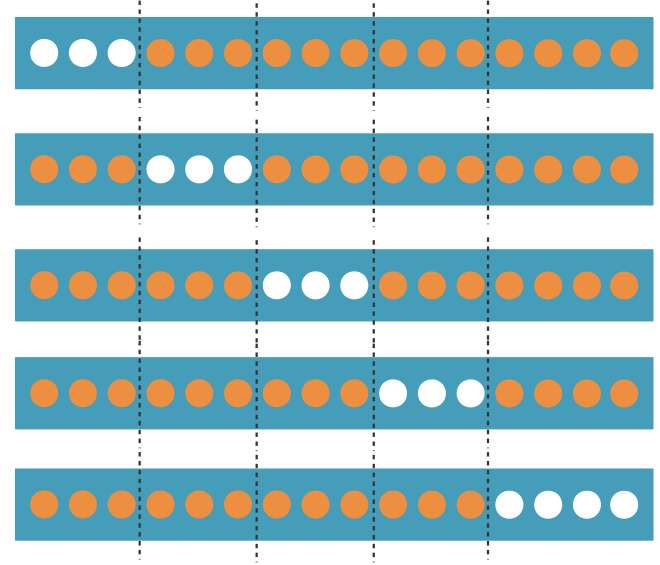

In [6]:
print("Ici, cross-validation à 5 folds")
Image("img/crossvalidation.png", width=300)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(model, X_train, y_train, cv=5)
np.mean(cv_score)

### –– Compromis biais-variance

Si le modèle peine à généraliser (bon résultat sur le trainset, mauvais sur le testset), c'est souvent que le compromis biais-variance est mauvais.
- La variance mesure la dépendance du modèle au dataset d'entraînement. Si la variance est trop grande, elle entraîne une tendance à l'overfitting (sur-apprentissage).
- Le biais mesure la liberté du modèle. Si le biais est trop grand, il entraîne une tendance à l'underfitting (sous-apprentissage).

Pour améliorer ce compromis biais-variance, on peut :

- **Réduire les dimensions** pour réduire la complexité du modèle.
- **Personnaliser les paramètres**.
- **Utiliser des algorithmes ensemblistes** qui se basent sur la combinaison de plusieurs modèles à haute variance et les aggrègent (par exemple en les moyennant) pour réduire la variance finale.

## B. Optimiser un modèle (Hyperparameters tuning)

Après avoir choisi un modèle, il convient de l'optimiser pour notre problématique. 

*Par exemple, dans le cas du K-NN, augmenter k permet de réduire la variance, et augmente donc le biais, ce qui peut permettre au modèle d'être plus performant. Pour chercher le k optimal, il est possible d'en essayer plusieurs manuellement, mais il existe aussi des méthodes automatiques qui permettent de tester plusieurs combinaisons de paramètres et d'en extraire la meilleure : **GridSearchCV** et **RandomizedSearchCV**.*

### –– GridSearchCV

In [ ]:
from sklearn import neighbors, metrics

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15],
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[25, 30, 35, 40],
              'p':[1, 2],
              'metric':['manhattan', 'minkowski']
             }

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), # un classifieur kNN
                                   param_grid, # hyperparamètres à tester
                                   cv=5, # nombre de folds de validation croisée
                                   scoring=score # score à optimiser
                                  )

# Optimiser ce classifieur sur le jeu d'entraînement
# clf.fit(X_train, y_train)
clf.fit(X_train_std, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen
                             clf.cv_results_['std_test_score'], # écart-type du score
                             clf.cv_results_['params'] # valeur de l'hyperparamètre
                            ):
    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
                                               mean, # score moyen
                                               std * 2, # barre d'erreur
                                               params # hyperparamètre
                                              )
         )

### –– RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 5, stop = 20, num = 16)],
               'max_features': [int(x) for x in np.linspace(10, 110, num = 11)],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

random_cv = RandomizedSearchCV(estimator = m1, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
print(random_cv.best_params_)

## D. Metrics pour les classifications

### –– Données déséquilibrées et Approche naïve

xxx

### –– Les types d'erreurs

**Attention**, lorsqu'on travaille sur des problématiques de classifications, toutes les erreurs ne se valent pas. Le modèle qui fait le moins d'erreur n'est en effet pas toujours le meilleur. Prenons l'exemple de la détection d'incendie, avec :  
- 0 : pas d'incendie
- 1 : incendie

Les erreurs possibles sont les suivantes :
- prédire un incendie (1) alors qu'il n'y en a pas (0) : on parle de *Faux positif (erreur de type I)*
- ne pas prédire d'incendie (0) alors qu'il y en a un (1) : on parle de *Faux négatif (erreur de type II)*

Dans le contexte de la prédiction d'incendie, la prévention prime ; il est donc préférable de prédire un incendie même s'il n'y en a pas (type I) que de ne pas prédire l'incendie alors qu'il y en a un (type II).  
Ainsi, si un modèle prédictif fait 20 erreurs au total mais conduit à 10 erreurs de type II, un modèle qui fait 30 erreurs au total mais seulement 4 erreurs de type II lui est préférable.

### –– Matrice de confusion

Pour visualiser ces différents types d'erreur, il existe une metric qu'on appelle *matrice de confusion*.

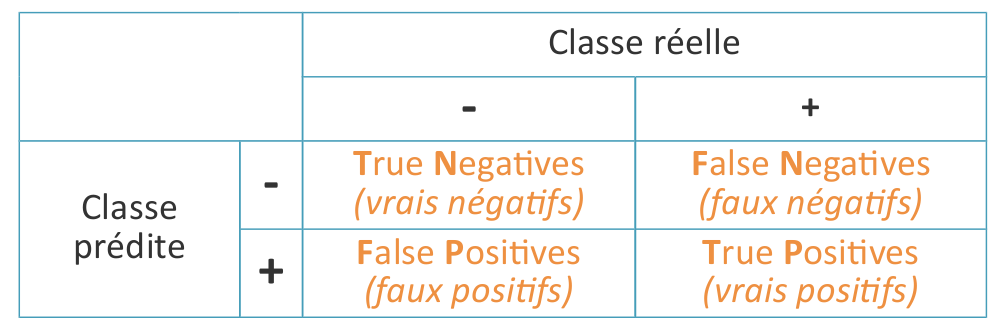

In [8]:
Image("img/confusion.png", width=500)

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(gb_model, X_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

Il est alors possible de calculer différents taux d'erreurs qui ont donné naissance à un compromis bien connu : le Precision-Recall.

### –– Precision-Recall

Dans l'absolu, on cherche à maximiser la *Precision* et le *Recall*.

La *Precision* correspond à la proportion de vrais positifs sur l'ensemble des prédictions positives. C'est donc la capacité du modèle à ne réagir qu'en cas de réel incendie.

$$Precision = \frac{Vrai Positif}{Vrai Positif + Faux Positif}$$

Le *Recall* inclue quant à lui les faux négatifs. Plus ils sont nombreux, plus le recall est faible. C'est la capacité du modèle à prédire tous les incendies.

$$Recall = \frac{Vrai Positif}{Vrai Positif + Faux Negatif}$$

Il est également intéressant de regarder la *Specificity* qui correspond à la capacité du modèle à prédire tous les non-incendies.

$$Specificity = \frac{Vrai Negatif}{Vrai Negatif + Faux Positif}$$


Pour évaluer le compromis entre *Precision* et *Recall* (ou Precision-Recall tradeoff), il existe le F1-score (*moyenne harmonique*).

$$F1score = 2 * \frac{Precision * Recall}{Precision + Recall}$$

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(precision_score(y_train, y_train_pred, average="binary", pos_label=1))
print(recall_score(y_train, y_train_pred, average="binary", pos_label=1))
print(f1_score(y_train, y_train_pred, pos_label=1))

**Courbe du Precision-Recall** :  

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_train_pred, pos_label=1)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

### –– ROC-AUC  

Un grand nombre d'algorithmes de Machine Learning retournent un score plutôt d'une prédiction binaire directement. 
Plus cette valeur est élevée, plus le point est susceptible d'appartenir à la classe positive. Pour revenir à une prédiction binaire, on va fixer un seuil : 
- score > seuil : prédiction positif
- score < seuil : prédiction négative

**Courbe ROC** :  
La courbe ROC montre comment le *Recall* évolue en fonction de la *Specificity*.

**AUC (Area Under the Curve)** :  

## X. Les modèles de régression

### –– Régression linéaire

https://openclassrooms.com/fr/courses/4525266-decrivez-et-nettoyez-votre-jeu-de-donnees/4774671-analysez-deux-variables-quantitatives-par-regression-lineaire

### –– Random Forest Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

In [ ]:
from catboost import CatBoostRegressor

cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbm_model = lgb.LGBMRegressor()
lgbm_model.fit(X_train, y_train)

In [ ]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

## D. Les modèles de classifications

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train,y_train)


from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


import xgboost as xgb
from xgboost.sklearn import XGBClassifier

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)


from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)


from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


from catboost import CatBoostClassifier

cb_model = CatBoostClassifier()
cb_model.fit(X_train, y_train)


from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)


from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm_model = lgb.LGBMClassifier()
lgbm_model.fit(X_train, y_train)